# Calculate link overlap in NULL Model of real network (HT09)  (RP)

In [107]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random

datapath = r"C:\Users\CAN_LC\Desktop\ht09.csv"
df = pd.read_csv(datapath, header = None)

t = (df[2]-df[2].min())/20
timestamp = [int(i) for i in t]  # normalize timestamp list

# random.shuffle(df[0])                                                  # rewire contact sequence
# timestamp = generate_N(min(timestamp), max(timestamp), len(timestamp))   # random times (RT)
random.shuffle(timestamp)                                              # randomly permuted time (RP)

df[2] = timestamp
df.columns = ["ID1",'ID2','timestamp']

print df

       ID1  ID2  timestamp
0      100  106       5039
1      100  106       5080
2      100  112       1984
3       10  101      10154
4       10  101       9532
5       10   11       5573
6       10  113      10583
7       10  113       1997
8       10  113       1902
9       10  113       1836
10      10  113      10268
11      10  113       1116
12      10  113       1946
13      10  113        771
14      10   12       9424
15      10   12       8714
16      10   12       5362
17      10   14       1703
18      10   14        190
19      10   14       6391
20      10   14       9117
21      10   14        571
22      10   14       1514
23      10   14       8675
24      10   14        120
25      10   14        704
26      10   14        277
27      10   14       5264
28      10   14       9250
29      10   14       1065
...    ...  ...        ...
20788    9   78       9597
20789    9   78       1972
20790    9   78       5201
20791    9   78       1238
20792    9   78       8717
2

In [108]:
# df is null model data
# df = pd.read_csv(datapath, header = None)

# t = (df[2]-df[2].min())/20
# timestamp = [int(i) for i in t]  # normalize timestamp list
# df[2] = timestamp

# df.columns = ["ID1",'ID2','timestamp']     # Timestamp = 0-10617, 20818 contact pairs
df.sort_values('timestamp', inplace=True)    # sorted by timestamp

windowSize = 3 * 1    # time window: 20s*3 = 1 min

for i in range(df['timestamp'].max()/windowSize):
    temp = df[df['timestamp']>= i*windowSize]
    data = temp[temp['timestamp']< (i+1)*windowSize]
    
    count =  data.groupby([data['ID1'],data['ID2']]).size()  # (ID1, ID2, weight)
    print count

    datapath = r"C:\Users\CAN_LC\Desktop\HT09\NULL_MODEL\%s_minute\RP\%s.csv" %(windowSize/3,i) # write net into a csv file
    count.to_csv(datapath)
    
N = df['timestamp'].max()/windowSize
print 'N is',N
taildata = df[df['timestamp']>= N * windowSize]
tailcount =  taildata.groupby([taildata['ID1'],taildata['ID2']]).size()  # (ID1, ID2, weight)
print "tail net is:\n",tailcount

taildatapath = r"C:\Users\CAN_LC\Desktop\HT09\NULL_MODEL\%s_minute\RP\%s.csv" %(windowSize/3,N) # write net into a csv file
tailcount.to_csv(taildatapath)

ID1  ID2
35   40     1
     64     1
105  110    1
dtype: int64
ID1  ID2
2    65     1
12   106    1
44   45     1
dtype: int64
ID1  ID2
43   45     1
44   101    1
53   55     1
dtype: int64
ID1  ID2
3    76     1
13   45     1
53   55     1
dtype: int64
ID1  ID2
18   47     1
31   63     1
63   88     1
dtype: int64
ID1  ID2
10   16     1
19   39     1
37   41     1
dtype: int64
ID1  ID2
45   75     1
54   101    1
73   86     1
dtype: int64
ID1  ID2
22   74     1
24   52     1
63   85     1
dtype: int64
ID1  ID2
23   72     1
83   88     1
105  110    1
dtype: int64
ID1  ID2
5    54     1
14   35     1
46   87     1
dtype: int64
ID1  ID2
8    45     1
31   35     1
54   65     1
dtype: int64
ID1  ID2
3    12     1
12   106    1
28   72     1
dtype: int64
ID1  ID2
14   35     1
72   108    1
84   92     1
dtype: int64
ID1  ID2
25   92     1
39   48     1
78   89     1
dtype: int64
ID1  ID2
28   54     1
31   63     1
105  110    1
dtype: int64
ID1  ID2
1    31     1
6    13     1
31 

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

Network has 5 nodes
Network has 3 edges
2


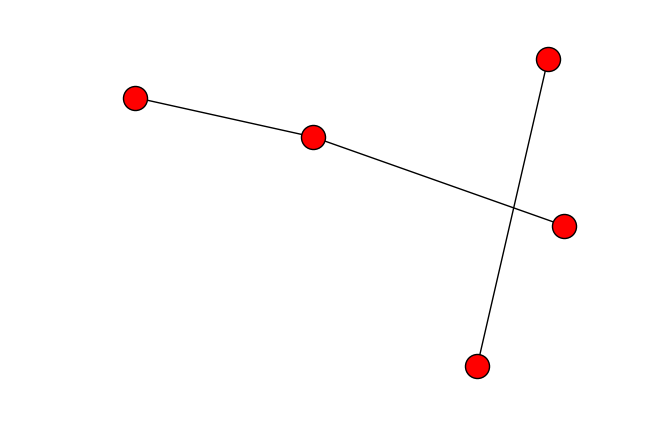

In [4]:
datapath = r"C:\Users\CAN_LC\Desktop\HT09\NULL_MODEL\1_minute\RP\0.csv"
def construct_Net(datapath):
    G = nx.empty_graph()
    try:
        contact = pd.read_csv(datapath, header = None)
        source = list(contact[0])
        target = list(contact[1])
        for i in range(len(source)):
            G.add_edge(source[i],target[i])
        return G
    except:
        print "empty net!"
        return G

G = construct_Net(datapath)

print "Network has %s nodes" % len(G.nodes())
print "Network has %s edges" % len(G.edges())
print nx.number_connected_components(G)
nx.draw(G,pos=nx.spring_layout(G))

plt.show()

network_0 has 80 links
network_0 has 76 nodes
network_0 density is: 0.0280701754386
0.0298136645963
density: 0.0113780025284
0.0335526315789
density: 0.0241782553729
0.0380198019802
density: 0.0303413400759
0.0444132772324
density: 0.0300252844501
0.033024691358
density: 0.0169089759798
0.0313513513514
density: 0.0137484197219
0.0386597938144
density: 0.0284450063211
0.0429202608879
density: 0.0322376738306
0.0312280701754
density: 0.0140644753477
0.0366934652649
density: 0.0281289506953
0.0764157014157
density: 0.0750632111252
0.060989010989
density: 0.0526232616941
0.0427819720888
density: 0.0295512010114
0.0317901234568
density: 0.0162768647282
0.0326116011762
density: 0.0192793931732
0.0382450009707
density: 0.0311314791403
0.0467870316443
density: 0.0380847029077
0.0269070010449
density: 0.0162768647282
0.0275893260968
density: 0.0096396965866
0.0454545454545
density: 0.0355562579014
0.0518315018315
density: 0.0447218710493
0.0483159936519
density: 0.0432996207332
0.028638028638
d

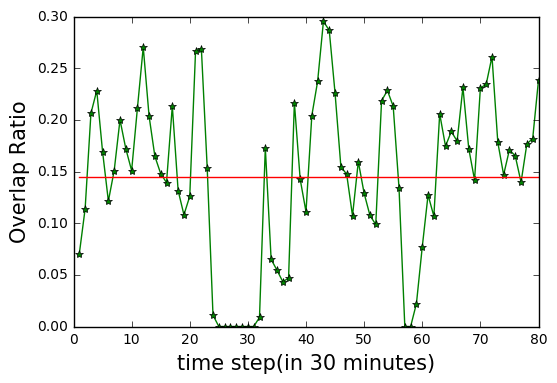

In [122]:
resolution = 30
netN = 10617/(3*resolution)+1

datapath = r"C:\Users\CAN_LC\Desktop\HT09\NULL_MODEL\%s_minute\RP\0.csv"%resolution
temporalNetFile1 = construct_Net(datapath)
Net1 = nx.to_dict_of_dicts(temporalNetFile1)
link1 = []
for n, neighbors in Net1.iteritems(): 
    for u in neighbors:
        link1.append("%s_%s"%(n,u))
print "network_0 has %s links"%(len(temporalNetFile1.edges()))
print "network_0 has %s nodes"%(len(temporalNetFile1))
print "network_0 density is:",nx.density(temporalNetFile1)

commonRatio = []
lastLink = link1
count = 0
for i in range(1,netN):    
    tempPath = r"C:\Users\CAN_LC\Desktop\HT09\NULL_MODEL\%s_minute\RP\%s.csv" %(resolution,i)
    temporalNetFile = construct_Net(tempPath)
    tempNet = nx.to_dict_of_dicts(temporalNetFile)
    if len(tempNet)>0 :
        print nx.density(nx.Graph(tempNet))             # only consider nodes appeared in this network
        templink = []
        for n, neighbors in tempNet.iteritems(): 
            for u in neighbors:
                templink.append("%s_%s"%(n,u))
#         print "network_%s has %s links"%(i,len(set(templink))/2)  
        print 'density:',len(templink)/float(113*112)   # take all nodes into consideration

        # calculate temporal corelation coefficient
#         tempRatio = len(set(lastLink) & set(templink))/(len(lastLink)*len(templink))**0.5
        tempRatio = len(set(lastLink) & set(templink))/float(len(set(lastLink) | set(templink)))
        commonRatio.append(tempRatio)
        lastLink = templink
    else:
        count += 1
print 'totally %s empty net'%count   

ave = sum(commonRatio)/len(commonRatio)
print "ave is",ave

fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)
# print commonRatio
ax.plot(range(1,len(commonRatio)+1),commonRatio,'g-*')
ax.plot(range(1,len(commonRatio)+1),[ave]*len(commonRatio),'r-')

# ax.legend(loc="best", fontsize=12)
# ax.set_xlabel("time step(in 1 hour)",fontsize=15)
ax.set_xlabel("time step(in %s minutes)"%resolution,fontsize=15)
ax.set_ylabel("Overlap Ratio",fontsize=15)
# ax.set_yticks(np.arange(0,0.41,0.1))
# ax.set_xticks(np.arange(0,50,2))

# save fig
figpath1 = r"C:\Users\CAN_LC\Desktop\HT09\FIG\%s_minute_overlap_NullM_RP.eps"%resolution
plt.savefig(figpath1,dpi=400,bbox_inches='tight')
figpath2 = r"C:\Users\CAN_LC\Desktop\HT09\FIG\%s_minute_overlap_NullM_RP.png"%resolution
plt.savefig(figpath2,dpi=400,bbox_inches='tight')

plt.show()

# Calculate link overlap in NULL Model of real network (HT09) (RT)

In [6]:
# generate n random integers list within [a,b]
def generate_N(a,b,N):
    """"
    Parameters
    ----------
    N :   number amount
    a :   start
    b ：  stop
    """
    numList = []
    for i in range(N):
        import random
        num = random.randint(a,b)
        numList.append(num)
    return numList

In [111]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random

datapath = r"C:\Users\CAN_LC\Desktop\ht09.csv"
df = pd.read_csv(datapath, header = None)

t = (df[2]-df[2].min())/20
timestamp = [int(i) for i in t]  # normalize timestamp list

# random.shuffle(df[0])                                                  # rewire contact sequence
timestamp = generate_N(min(timestamp), max(timestamp), len(timestamp))   # random times (RT)
# random.shuffle(timestamp)                                              # randomly permuted time (RP)

df[2] = timestamp
df.columns = ["ID1",'ID2','timestamp']

print df

       ID1  ID2  timestamp
0      100  106       4435
1      100  106       3455
2      100  112       5001
3       10  101       1191
4       10  101       5053
5       10   11       2731
6       10  113       7844
7       10  113       8206
8       10  113       8355
9       10  113       7881
10      10  113       4289
11      10  113       3748
12      10  113       2731
13      10  113       4142
14      10   12       8704
15      10   12       3771
16      10   12       7671
17      10   14       5243
18      10   14       6001
19      10   14       1500
20      10   14        880
21      10   14       4799
22      10   14       3550
23      10   14       6024
24      10   14       8753
25      10   14      10530
26      10   14       5109
27      10   14       8673
28      10   14       6214
29      10   14       3765
...    ...  ...        ...
20788    9   78       6402
20789    9   78       2333
20790    9   78       4803
20791    9   78       8359
20792    9   78       5873
2

In [112]:
# df is null model data
# df = pd.read_csv(datapath, header = None)

# t = (df[2]-df[2].min())/20
# timestamp = [int(i) for i in t]  # normalize timestamp list
# df[2] = timestamp

# df.columns = ["ID1",'ID2','timestamp']     # Timestamp = 0-10617, 20818 contact pairs
df.sort_values('timestamp', inplace=True)    # sorted by timestamp

windowSize = 3 * 1    # time window: 20s*3*60 = 1 hour

for i in range(df['timestamp'].max()/windowSize):
    temp = df[df['timestamp']>= i*windowSize]
    data = temp[temp['timestamp']< (i+1)*windowSize]
    
    count =  data.groupby([data['ID1'],data['ID2']]).size()  # (ID1, ID2, weight)
    print count

    datapath = r"C:\Users\CAN_LC\Desktop\HT09\NULL_MODEL\%s_minute\RT\%s.csv" %(windowSize/3,i)  # write net into a csv file
    count.to_csv(datapath)
    
N = df['timestamp'].max()/windowSize
print 'N is',N
taildata = df[df['timestamp']>= N * windowSize]
tailcount =  taildata.groupby([taildata['ID1'],taildata['ID2']]).size()  # (ID1, ID2, weight)
print "tail net is:\n",tailcount

taildatapath = r"C:\Users\CAN_LC\Desktop\HT09\NULL_MODEL\%s_minute\RT\%s.csv" %(windowSize/3,N)  # write net into a csv file
tailcount.to_csv(taildatapath)

ID1  ID2
1    4      1
6    12     1
14   35     1
37   41     1
39   40     1
40   88     1
87   106    1
91   95     1
dtype: int64
ID1  ID2
12   46     1
14   16     1
39   40     1
44   101    1
54   65     1
dtype: int64
ID1  ID2
1    3      1
3    94     1
10   73     1
     93     1
20   71     1
25   27     1
54   72     1
105  110    1
dtype: int64
ID1  ID2
6    54     1
8    69     1
18   47     1
23   28     1
dtype: int64
ID1  ID2
3    15     1
8    45     1
19   73     1
37   65     1
49   65     1
53   55     1
105  110    1
dtype: int64
ID1  ID2
2    11     1
15   74     1
17   31     1
46   75     1
53   56     1
dtype: int64
ID1  ID2
1    4      1
2    12     1
4    32     1
23   72     1
28   72     1
90   91     1
105  110    1
dtype: int64
ID1  ID2
1    103    1
8    69     1
     78     1
12   69     1
14   18     1
     63     1
24   78     1
40   53     1
66   82     1
dtype: int64
ID1  ID2
1    2      1
     4      1
10   74     1
73   86     1
83   101    1
105

Network has 15 nodes
Network has 8 edges
7


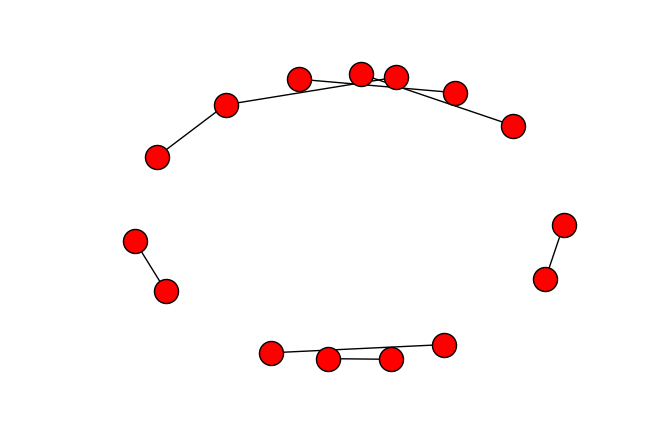

In [113]:
datapath = r"C:\Users\CAN_LC\Desktop\HT09\NULL_MODEL\1_minute\RT\0.csv"
def construct_Net(datapath):
    G = nx.empty_graph()
    try:
        contact = pd.read_csv(datapath, header = None)
        source = list(contact[0])
        target = list(contact[1])
        for i in range(len(source)):
            G.add_edge(source[i],target[i])
        return G
    except:
        print "empty net!"
        return G

G = construct_Net(datapath)

print "Network has %s nodes" % len(G.nodes())
print "Network has %s edges" % len(G.edges())
print nx.number_connected_components(G)
nx.draw(G,pos=nx.spring_layout(G))

plt.show()

network_0 has 224 links
network_0 has 99 nodes
network_0 density is: 0.046176046176
0.046176046176
density: 0.0353982300885
0.0407687827606
density: 0.033185840708
0.0423218792467
density: 0.0344500632111
0.0456553755523
density: 0.0342920353982
0.0426262626263
density: 0.0333438685209
0.0442632498544
density: 0.0360303413401
0.0438760268857
density: 0.0371365360303
0.0425160163075
density: 0.034608091024
0.0419336051252
density: 0.0341340075853
0.0431683168317
density: 0.0344500632111
0.04329004329
density: 0.033185840708
0.040790655885
density: 0.0358723135272
0.0453465346535
density: 0.036188369153
0.0444573869152
density: 0.036188369153
0.0399747527877
density: 0.0300252844501
0.0447524752475
density: 0.0357142857143
0.0411570568822
density: 0.0335018963338
0.0426422996383
density: 0.0353982300885
0.039603960396
density: 0.0322376738306
0.0436893203883
density: 0.0369785082174
0.045428072219
density: 0.0369785082174
0.0418682937092
density: 0.0314475347661
0.0430303030303
density: 

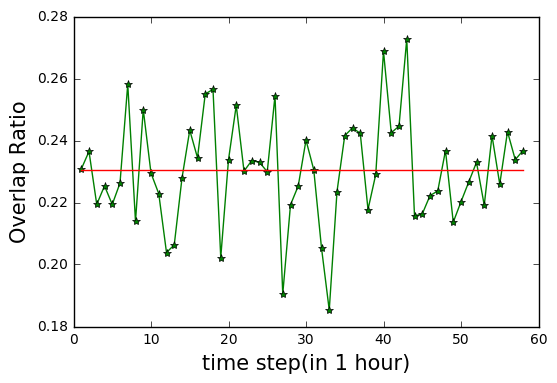

In [130]:
resolution = 60 
netN = 10617/(3*resolution)+1

datapath = r"C:\Users\CAN_LC\Desktop\HT09\NULL_MODEL\%s_minute\RT\0.csv"%resolution
temporalNetFile1 = construct_Net(datapath)
Net1 = nx.to_dict_of_dicts(temporalNetFile1)
link1 = []
for n, neighbors in Net1.iteritems(): 
    for u in neighbors:
        link1.append("%s_%s"%(n,u))
print "network_0 has %s links"%(len(temporalNetFile1.edges()))
print "network_0 has %s nodes"%(len(temporalNetFile1))
print "network_0 density is:",nx.density(temporalNetFile1)

commonRatio = []
lastLink = link1
count = 0
for i in range(1,netN):    
    tempPath = r"C:\Users\CAN_LC\Desktop\HT09\NULL_MODEL\%s_minute\RT\%s.csv" %(resolution,i)
    temporalNetFile = construct_Net(tempPath)
    tempNet = nx.to_dict_of_dicts(temporalNetFile)
    if len(tempNet)>0 :
        print nx.density(nx.Graph(tempNet))             # only consider nodes appeared in this network
        templink = []
        for n, neighbors in tempNet.iteritems(): 
            for u in neighbors:
                templink.append("%s_%s"%(n,u))
#         print "network_%s has %s links"%(i,len(set(templink))/2)  
        print 'density:',len(templink)/float(113*112)   # take all nodes into consideration

        # calculate temporal corelation coefficient
#         tempRatio = len(set(lastLink) & set(templink))/(len(lastLink)*len(templink))**0.5
        tempRatio = len(set(lastLink) & set(templink))/float(len(set(lastLink) | set(templink)))
        commonRatio.append(tempRatio)
        lastLink = templink
    else:
        count += 1
print 'totally %s empty net'%count   

ave = sum(commonRatio)/len(commonRatio)
print "ave is",ave

fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)
# print commonRatio
ax.plot(range(1,len(commonRatio)+1),commonRatio,'g-*')
ax.plot(range(1,len(commonRatio)+1),[ave]*len(commonRatio),'r-')

# ax.legend(loc="best", fontsize=12)
ax.set_xlabel("time step(in 1 hour)",fontsize=15)
# ax.set_xlabel("time step(in %s minutes)"%resolution,fontsize=15)
ax.set_ylabel("Overlap Ratio",fontsize=15)
# ax.set_yticks(np.arange(0,0.46,0.05))
# ax.set_xticks(np.arange(0,50,2))

# save fig
figpath1 = r"C:\Users\CAN_LC\Desktop\HT09\FIG\%s_minute_overlap_NullM_RT.eps"%resolution
plt.savefig(figpath1,dpi=400,bbox_inches='tight')
figpath2 = r"C:\Users\CAN_LC\Desktop\HT09\FIG\%s_minute_overlap_NullM_RT.png"%resolution
plt.savefig(figpath2,dpi=400,bbox_inches='tight')

plt.show()

# Calculate link overlap in NULL Model of real network (HT09) (RC)

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random

DATASET = 'Sexual_escorts'
datapath = r"C:\Users\CAN_LC\Desktop\%s.csv"%DATASET
df = pd.read_csv(datapath, header = None)

# t = (df[2]-df[2].min())/20
# timestamp = [int(i) for i in t]  # normalize timestamp list

random.shuffle(df[0])                                                  # rewire contact sequence
random.shuffle(df[1])
# timestamp = generate_N(min(timestamp), max(timestamp), len(timestamp))   # random times (RT)
# random.shuffle(timestamp)                                              # randomly permuted time (RP)

# df[2] = timestamp
df.columns = ["ID1",'ID2','timestamp']

print df

         ID1    ID2  timestamp
0       4717  12808          0
1      10773   1646          0
2      10156    432          0
3       4585   6715         21
4       3338   2177         47
5      10099   9861         73
6       2085   1529        105
7       9008   2407        121
8       7047   3564        124
9       4329  13911        126
10      6813  10847        168
11      2916  10408        171
12      7395   2018        172
13     13305   2439        179
14      6813  11473        179
15       871   8719        179
16      7433   4694        184
17      3365   3211        185
18      2897    370        192
19      3461   3650        193
20      1688    821        194
21      4063   7630        204
22     13813   4897        206
23        18   2712        207
24     11766   2756        216
25      3080   1121        217
26      3668   1814        223
27     15743   4268        229
28      5682   3067        238
29     16596   8555        243
...      ...    ...        ...
50602   

In [47]:
# df is null model data
# df = pd.read_csv(datapath, header = None)

# t = (df[2]-df[2].min())/20
# timestamp = [int(i) for i in t]  # normalize timestamp list
# df[2] = timestamp

# df.columns = ["ID1",'ID2','timestamp']     # Timestamp = 0-10617, 20818 contact pairs

df.sort_values('timestamp', inplace=True)    # sorted by timestamp

windowSize = 3 * 1    # time window: 20s*3*60 = 1 hour

for i in range(df['timestamp'].max()/windowSize):
    temp = df[df['timestamp']>= i*windowSize]
    data = temp[temp['timestamp']< (i+1)*windowSize]
    
    count =  data.groupby([data['ID1'],data['ID2']]).size()  # (ID1, ID2, weight)
    print count

    datapath = r"C:\Users\CAN_LC\Desktop\HT09\NULL_MODEL\%s_minute\RC\%s.csv" %(windowSize/3,i)  # write net into a csv file
    count.to_csv(datapath)
    
N = df['timestamp'].max()/windowSize
print 'N is',N
taildata = df[df['timestamp']>= N * windowSize]
tailcount =  taildata.groupby([taildata['ID1'],taildata['ID2']]).size()  # (ID1, ID2, weight)
print "tail net is:\n",tailcount

taildatapath = r"C:\Users\CAN_LC\Desktop\HT09\NULL_MODEL\%s_minute\RC\%s.csv" %(windowSize/3,N)  # write net into a csv file
tailcount.to_csv(taildatapath)

ID1  ID2
12   113    1
14   73     1
15   54     1
dtype: int64
ID1  ID2
4    87     1
6    99     1
25   56     1
dtype: int64
ID1  ID2
14   64     1
24   71     1
44   92     1
dtype: int64
ID1  ID2
1    45     1
14   73     1
41   34     1
dtype: int64
ID1  ID2
1    63     1
     72     1
18   110    1
dtype: int64
ID1  ID2
1    2      1
12   64     1
50   6      1
dtype: int64
ID1  ID2
2    101    1
40   91     1
93   78     1
dtype: int64
ID1  ID2
1    73     1
8    45     1
28   110    1
dtype: int64
ID1  ID2
23   105    1
44   12     1
83   76     1
dtype: int64
ID1  ID2
1    85     1
24   55     1
61   48     1
dtype: int64
ID1  ID2
12   85     1
23   31     1
105  101    1
dtype: int64
ID1  ID2
1    65     1
8    95     1
89   55     1
dtype: int64
ID1  ID2
19   29     1
28   48     1
45   106    1
dtype: int64
ID1  ID2
1    63     1
37   35     1
105  101    1
dtype: int64
ID1  ID2
1    63     1
35   110    1
77   110    1
dtype: int64
ID1  ID2
1    62     1
12   37     1
57 

Network has 6 nodes
Network has 3 edges
3


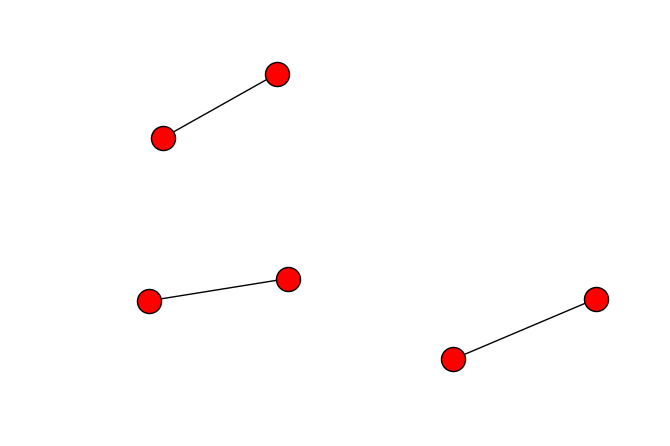

In [8]:
datapath = r"C:\Users\CAN_LC\Desktop\HT09\NULL_MODEL\1_minute\RC\0.csv"
def construct_Net(datapath):
    G = nx.empty_graph()
    try:
        contact = pd.read_csv(datapath, header = None)
        source = list(contact[0])
        target = list(contact[1])
        for i in range(len(source)):
            G.add_edge(source[i],target[i])
        return G
    except:
        print "empty net!"
        return G

G = construct_Net(datapath)

print "Network has %s nodes" % len(G.nodes())
print "Network has %s edges" % len(G.edges())
print nx.number_connected_components(G)
nx.draw(G,pos=nx.spring_layout(G))

plt.show()

network_0 has 90 links
network_0 has 72 nodes
network_0 density is: 0.0352112676056
0.0324726134585
density: 0.0131163084703
0.0461922596754
density: 0.0289981036662
0.0542124542125
density: 0.0465391908976
0.0563596491228
density: 0.040613147914
0.0361149110807
density: 0.0207016434893
0.0378378378378
density: 0.0165139064475
0.0502192982456
density: 0.0361093552465
0.0632323232323
density: 0.0492256637168
0.0368421052632
density: 0.016592920354
0.0526732673267
density: 0.0419563843236
0.143953294412
density: 0.135508849558
0.0953109072375
density: 0.0880214917826
0.0545532646048
density: 0.0399810366625
0.035570854848
density: 0.0195164348925
0.0414327719861
density: 0.0244152970923
0.0571016285302
density: 0.0436946902655
0.0660941000747
density: 0.0558628318584
0.0407407407407
density: 0.0208596713021
0.0335664335664
density: 0.0113780025284
0.0663948747816
density: 0.0536504424779
0.0782277604708
density: 0.0709544879899
0.0805668802174
density: 0.0652654867257
0.0367567567568
den

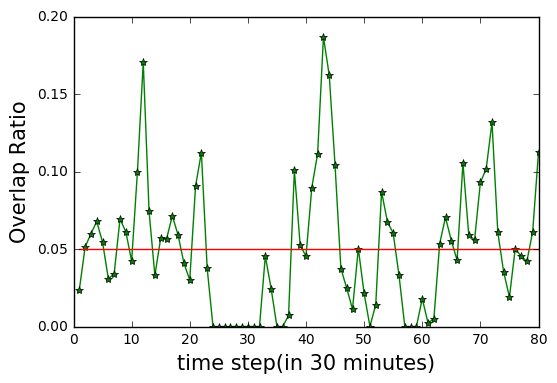

In [137]:
resolution = 30
netN = 10617/(3*resolution)+1

datapath = r"C:\Users\CAN_LC\Desktop\HT09\NULL_MODEL\%s_minute\RC\0.csv"%resolution
temporalNetFile1 = construct_Net(datapath)
Net1 = nx.to_dict_of_dicts(temporalNetFile1)
link1 = []
for n, neighbors in Net1.iteritems(): 
    for u in neighbors:
        link1.append("%s_%s"%(n,u))
print "network_0 has %s links"%(len(temporalNetFile1.edges()))
print "network_0 has %s nodes"%(len(temporalNetFile1))
print "network_0 density is:",nx.density(temporalNetFile1)

commonRatio = []
lastLink = link1
count = 0
for i in range(1,netN):    
    tempPath = r"C:\Users\CAN_LC\Desktop\HT09\NULL_MODEL\%s_minute\RC\%s.csv" %(resolution,i)
    temporalNetFile = construct_Net(tempPath)
    tempNet = nx.to_dict_of_dicts(temporalNetFile)
    if len(tempNet)>0 :
        print nx.density(nx.Graph(tempNet))             # only consider nodes appeared in this network
        templink = []
        for n, neighbors in tempNet.iteritems(): 
            for u in neighbors:
                templink.append("%s_%s"%(n,u))
#         print "network_%s has %s links"%(i,len(set(templink))/2)  
        print 'density:',len(templink)/float(113*112)   # take all nodes into consideration

        # calculate temporal corelation coefficient
#         tempRatio = len(set(lastLink) & set(templink))/(len(lastLink)*len(templink))**0.5
        tempRatio = len(set(lastLink) & set(templink))/float(len(set(lastLink) | set(templink)))
        commonRatio.append(tempRatio)
        lastLink = templink
    else:
        count += 1
print 'totally %s empty net'%count   

ave = sum(commonRatio)/len(commonRatio)
print "ave is",ave

fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)
# print commonRatio
ax.plot(range(1,len(commonRatio)+1),commonRatio,'g-*')
ax.plot(range(1,len(commonRatio)+1),[ave]*len(commonRatio),'r-')

# ax.legend(loc="best", fontsize=12)
# ax.set_xlabel("time step(in 1 hour)",fontsize=15)
ax.set_xlabel("time step(in %s minutes)"%resolution,fontsize=15)
# ax.set_xlabel("time step(in 1 hour)",fontsize=15)
ax.set_ylabel("Overlap Ratio",fontsize=15)
# ax.set_yticks(np.arange(0,0.41,0.05))
# ax.set_xticks(np.arange(0,50,2))

# save fig
figpath1 = r"C:\Users\CAN_LC\Desktop\HT09\FIG\%s_minute_overlap_NullM_RC.eps"%resolution
plt.savefig(figpath1,dpi=400,bbox_inches='tight')
figpath2 = r"C:\Users\CAN_LC\Desktop\HT09\FIG\%s_minute_overlap_NullM_RC.png"%resolution
plt.savefig(figpath2,dpi=400,bbox_inches='tight')

plt.show()

network_0 has 34 links
network_0 has 66 nodes
network_0 density is: 0.0158508158508
0.0100732600733
density: 0.00869152970923
0.00839664134346
density: 0.00995575221239
0.00598198682619
density: 0.0140644753477
0.0114667940755
density: 0.00758533501896
0.00739979445015
density: 0.0113780025284
0.00451383750185
density: 0.0192793931732
0.00481527604815
density: 0.0183312262958
0.00386982832507
density: 0.0235461441214
0.00285951098218
density: 0.0327117572693
0.00343580470163
density: 0.0270227560051
0.00242811624247
density: 0.0399810366625
0.00203187879744
density: 0.0488305941846
0.00203498845728
density: 0.048198482933
0.00186486954288
density: 0.052781289507
0.00185060385311
density: 0.0546776232617
0.00154795410262
density: 0.067793931732
0.00132570716936
density: 0.0834386852086
0.0012973504719
density: 0.0908659924147
0.0014062526796
density: 0.0777496839444
0.00141927274507
density: 0.0779077117573
0.00137163121714
density: 0.0804361567636
0.00125919712912
density: 0.0937104930

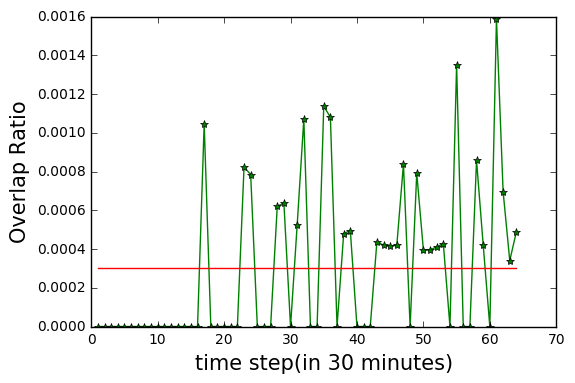

In [13]:
resolution = 30
netN = 2232/(resolution)+1
DATASET = 'Sexual_escorts'

datapath = r"C:\Users\CAN_LC\Desktop\%s\NULL_MODEL\1_month\RC\10.csv"%(DATASET)
temporalNetFile1 = construct_Net(datapath)
Net1 = nx.to_dict_of_dicts(temporalNetFile1)
link1 = []
for n, neighbors in Net1.iteritems(): 
    for u in neighbors:
        link1.append("%s_%s"%(n,u))
print "network_0 has %s links"%(len(temporalNetFile1.edges()))
print "network_0 has %s nodes"%(len(temporalNetFile1))
print "network_0 density is:",nx.density(temporalNetFile1)

commonRatio = []
lastLink = link1
count = 0
for i in range(11,netN):    
    tempPath = r"C:\Users\CAN_LC\Desktop\%s\NULL_MODEL\1_month\RC\%s.csv" %(DATASET,i)
    temporalNetFile = construct_Net(tempPath)
    tempNet = nx.to_dict_of_dicts(temporalNetFile)
    if len(tempNet)>0 :
        print nx.density(nx.Graph(tempNet))             # only consider nodes appeared in this network
        templink = []
        for n, neighbors in tempNet.iteritems(): 
            for u in neighbors:
                templink.append("%s_%s"%(n,u))
#         print "network_%s has %s links"%(i,len(set(templink))/2)  
        print 'density:',len(templink)/float(113*112)   # take all nodes into consideration

        # calculate temporal corelation coefficient
#         tempRatio = len(set(lastLink) & set(templink))/(len(lastLink)*len(templink))**0.5
        tempRatio = len(set(lastLink) & set(templink))/float(len(set(lastLink) | set(templink)))
        commonRatio.append(tempRatio)
        lastLink = templink
    else:
        count += 1
print 'totally %s empty net'%count   

ave = sum(commonRatio)/len(commonRatio)
print "ave is",ave

fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)
# print commonRatio
ax.plot(range(1,len(commonRatio)+1),commonRatio,'g-*')
ax.plot(range(1,len(commonRatio)+1),[ave]*len(commonRatio),'r-')

# ax.legend(loc="best", fontsize=12)
# ax.set_xlabel("time step(in 1 hour)",fontsize=15)
ax.set_xlabel("time step(in %s minutes)"%resolution,fontsize=15)
# ax.set_xlabel("time step(in 1 hour)",fontsize=15)
ax.set_ylabel("Overlap Ratio",fontsize=15)
# ax.set_yticks(np.arange(0,0.41,0.05))
# ax.set_xticks(np.arange(0,50,2))

# save fig
# figpath1 = r"C:\Users\CAN_LC\Desktop\%s\FIG\1_month_overlap_NullM_RC.eps"%DATASET
# plt.savefig(figpath1,dpi=400,bbox_inches='tight')
# figpath2 = r"C:\Users\CAN_LC\Desktop\%s\FIG\1_month_overlap_NullM_RC.png"%DATASET
# plt.savefig(figpath2,dpi=400,bbox_inches='tight')

plt.show()

# Calculate link overlap in NULL Model of real network (HT09) (RC+RP)

In [128]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random

datapath = r"C:\Users\CAN_LC\Desktop\ht09.csv"
df = pd.read_csv(datapath, header = None)

t = (df[2]-df[2].min())/20
timestamp = [int(i) for i in t]  # normalize timestamp list

random.shuffle(df[0])                                                  # rewire contact sequence
random.shuffle(df[1])
# timestamp = generate_N(min(timestamp), max(timestamp), len(timestamp))   # random times (RT)
random.shuffle(timestamp)                                              # randomly permuted time (RP)

df[2] = timestamp
df.columns = ["ID1",'ID2','timestamp']

print df

       ID1  ID2  timestamp
0       15   70       5320
1       10   73       1118
2       45   91       5224
3       12   96       4864
4       19   27       1193
5      105   73       1066
6        8   73      10151
7        4   55       5355
8       23   78       1576
9       15   69       4885
10      14   38      10234
11       3   49       8730
12      23   73       4725
13       2   35        719
14      10    3       9138
15      54   56        422
16      57   90       9317
17     105   64       9902
18      55  102       8917
19       1   91       9411
20      10   45       1005
21     105   91       5424
22       6   93        719
23      31   63       6342
24     105   54       4427
25      84   28       5360
26     105  113       6171
27       1   64       6131
28      68   16       1924
29      14   66       6035
...    ...  ...        ...
20788    3   87       5558
20789    8   99      10530
20790   44   85       5311
20791   10   27       1803
20792   13    8       4862
2

In [129]:
# df is null model data
# df = pd.read_csv(datapath, header = None)

# t = (df[2]-df[2].min())/20
# timestamp = [int(i) for i in t]  # normalize timestamp list
# df[2] = timestamp

# df.columns = ["ID1",'ID2','timestamp']     # Timestamp = 0-10617, 20818 contact pairs
df.sort_values('timestamp', inplace=True)    # sorted by timestamp

windowSize = 3 * 1    # time window: 20s*3 = 1 min

for i in range(df['timestamp'].max()/windowSize):
    temp = df[df['timestamp']>= i*windowSize]
    data = temp[temp['timestamp']< (i+1)*windowSize]
    
    count =  data.groupby([data['ID1'],data['ID2']]).size()  # (ID1, ID2, weight)
    print count

    datapath = r"C:\Users\CAN_LC\Desktop\HT09\NULL_MODEL\%s_minute\RC+RP\%s.csv" %(windowSize/3,i)  # write net into a csv file
    count.to_csv(datapath)
    
N = df['timestamp'].max()/windowSize
print 'N is',N
taildata = df[df['timestamp']>= N * windowSize]
tailcount =  taildata.groupby([taildata['ID1'],taildata['ID2']]).size()  # (ID1, ID2, weight)
print "tail net is:\n",tailcount

taildatapath = r"C:\Users\CAN_LC\Desktop\HT09\NULL_MODEL\%s_minute\RC+RP\%s.csv" %(windowSize/3,N)  # write net into a csv file
tailcount.to_csv(taildatapath)

ID1  ID2
13   110    1
23   55     1
54   85     1
dtype: int64
ID1  ID2
3    97     1
6    35     1
105  31     1
dtype: int64
ID1  ID2
4    101    1
12   74     1
40   102    1
dtype: int64
ID1  ID2
2    68     1
8    54     1
53   74     1
dtype: int64
ID1  ID2
10   13     1
31   74     1
46   78     1
dtype: int64
ID1  ID2
23   46     1
28   91     1
43   76     1
dtype: int64
ID1  ID2
6    90     1
12   90     1
45   65     1
dtype: int64
ID1  ID2
8    87     1
28   24     1
44   14     1
dtype: int64
ID1  ID2
19   54     1
     71     1
48   4      1
dtype: int64
ID1  ID2
1    69     1
2    12     1
43   16     1
dtype: int64
ID1  ID2
23   3      1
25   19     1
61   66     1
dtype: int64
ID1  ID2
19   37     1
41   110    1
105  25     1
dtype: int64
ID1  ID2
11   99     1
42   64     1
53   2      1
dtype: int64
ID1  ID2
19   13     1
74   47     1
89   64     1
dtype: int64
ID1  ID2
12   74     1
53   27     1
54   70     1
dtype: int64
ID1  ID2
7    37     1
10   110    1
49 

Network has 6 nodes
Network has 3 edges
3


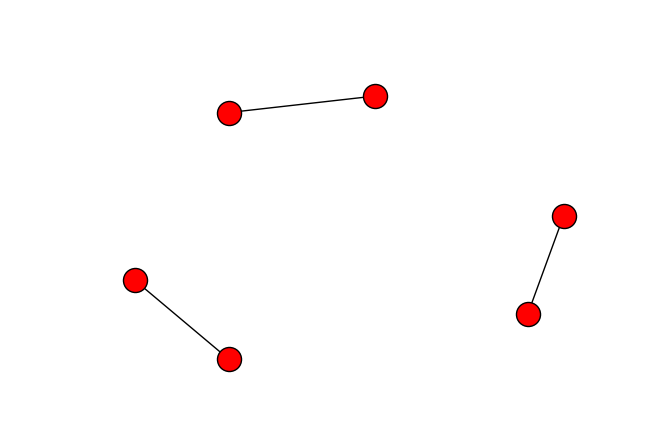

In [130]:
datapath = r"C:\Users\CAN_LC\Desktop\HT09\NULL_MODEL\1_minute\RC+RP\0.csv"
def construct_Net(datapath):
    G = nx.empty_graph()
    try:
        contact = pd.read_csv(datapath, header = None)
        source = list(contact[0])
        target = list(contact[1])
        for i in range(len(source)):
            G.add_edge(source[i],target[i])
        return G
    except:
        print "empty net!"
        return G

G = construct_Net(datapath)

print "Network has %s nodes" % len(G.nodes())
print "Network has %s edges" % len(G.edges())
print nx.number_connected_components(G)
nx.draw(G,pos=nx.spring_layout(G))

plt.show()

network_0 has 87 links
network_0 has 71 nodes
network_0 density is: 0.0350100603622
0.0400932400932
density: 0.0135113780025
0.0416579002735
density: 0.0312104930468
0.0605933094887
density: 0.0453539823009
0.0559210526316
density: 0.0402180783818
0.0352846832398
density: 0.0207016434893
0.0350535540409
density: 0.0169879898862
0.0441652389111
density: 0.0365834386852
0.0674087816945
density: 0.0513590391909
0.0378947368421
density: 0.0169879898862
0.0546279117708
density: 0.0417983565107
0.14495412844
density: 0.136773072061
0.0976900017634
density: 0.0871523388116
0.0510891089109
density: 0.0406921618205
0.0376392652815
density: 0.0196744627054
0.0396716826265
density: 0.0229140328698
0.0656951743908
density: 0.0432996207332
0.0694841043213
density: 0.0572850821745
0.0372549019608
density: 0.0209386852086
0.0321121664405
density: 0.0110619469027
0.0627333831217
density: 0.0529393173198
0.0827838827839
density: 0.0711915297092
0.0771062271062
density: 0.0663716814159
0.036036036036
de

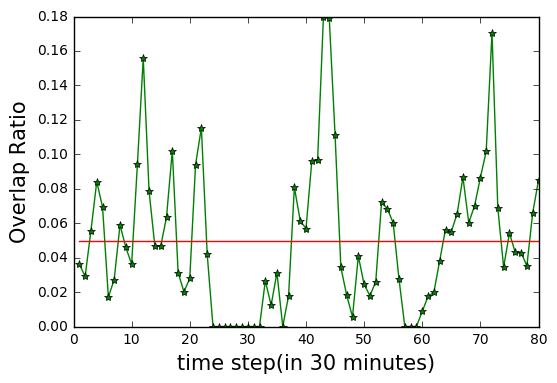

In [144]:
resolution = 30
netN = 10617/(3*resolution)+1

datapath = r"C:\Users\CAN_LC\Desktop\HT09\NULL_MODEL\%s_minute\RC+RP\0.csv"%resolution
temporalNetFile1 = construct_Net(datapath)
Net1 = nx.to_dict_of_dicts(temporalNetFile1)
link1 = []
for n, neighbors in Net1.iteritems(): 
    for u in neighbors:
        link1.append("%s_%s"%(n,u))
print "network_0 has %s links"%(len(temporalNetFile1.edges()))
print "network_0 has %s nodes"%(len(temporalNetFile1))
print "network_0 density is:",nx.density(temporalNetFile1)

commonRatio = []
lastLink = link1
count = 0
for i in range(1,netN):    
    tempPath = r"C:\Users\CAN_LC\Desktop\HT09\NULL_MODEL\%s_minute\RC+RP\%s.csv" %(resolution,i)
    temporalNetFile = construct_Net(tempPath)
    tempNet = nx.to_dict_of_dicts(temporalNetFile)
    if len(tempNet)>0 :
        print nx.density(nx.Graph(tempNet))             # only consider nodes appeared in this network
        templink = []
        for n, neighbors in tempNet.iteritems(): 
            for u in neighbors:
                templink.append("%s_%s"%(n,u))
#         print "network_%s has %s links"%(i,len(set(templink))/2)  
        print 'density:',len(templink)/float(113*112)   # take all nodes into consideration

        # calculate temporal corelation coefficient
#         tempRatio = len(set(lastLink) & set(templink))/(len(lastLink)*len(templink))**0.5
        tempRatio = len(set(lastLink) & set(templink))/float(len(set(lastLink) | set(templink)))
        commonRatio.append(tempRatio)
        lastLink = templink
    else:
        count += 1
print 'totally %s empty net'%count   

ave = sum(commonRatio)/len(commonRatio)
print "ave is",ave

fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)
# print commonRatio
ax.plot(range(1,len(commonRatio)+1),commonRatio,'g-*')
ax.plot(range(1,len(commonRatio)+1),[ave]*len(commonRatio),'r-')

# ax.legend(loc="best", fontsize=12)
# ax.set_xlabel("time step(in 1 hour)",fontsize=15)
ax.set_xlabel("time step(in %s minutes)"%resolution,fontsize=15)
ax.set_ylabel("Overlap Ratio",fontsize=15)
# ax.set_yticks(np.arange(0,0.41,0.05))
# ax.set_xticks(np.arange(0,50,2))

# save fig
figpath1 = r"C:\Users\CAN_LC\Desktop\HT09\FIG\%s_minute_overlap_NullM_RC+RP.eps"%resolution
plt.savefig(figpath1,dpi=400,bbox_inches='tight')
figpath2 = r"C:\Users\CAN_LC\Desktop\HT09\FIG\%s_minute_overlap_NullM_RC+RP.png"%resolution
plt.savefig(figpath2,dpi=400,bbox_inches='tight')

plt.show()

# Calculate link overlap in NULL Model of real network (HT09) (RC+RT)

In [142]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random

datapath = r"C:\Users\CAN_LC\Desktop\ht09.csv"
df = pd.read_csv(datapath, header = None)

t = (df[2]-df[2].min())/20
timestamp = [int(i) for i in t]  # normalize timestamp list

random.shuffle(df[0])                                                  # rewire contact sequence
random.shuffle(df[1])
timestamp = generate_N(min(timestamp), max(timestamp), len(timestamp))   # random times (RT)
# random.shuffle(timestamp)                                              # randomly permuted time (RP)

df[2] = timestamp
df.columns = ["ID1",'ID2','timestamp']

print df

       ID1  ID2  timestamp
0        4   31       5355
1       46  102       1827
2       53   78       2909
3       10   24       4091
4       46   44       7709
5       62   78       8686
6       47   14       6156
7       12   65        630
8       42   37       8637
9       65   72      10573
10      10   48        369
11      90   72       1225
12      53   78       3804
13      10   91       2656
14      44   86       8917
15      40   40       5357
16       5   54      10082
17      45   69       6187
18      58   12       9171
19      27   17        279
20      65   72       3904
21      48   73       5207
22      12   31       9071
23      12   64       9627
24       6   73       1765
25      47   54         51
26       3   72       6178
27       4   84       6578
28      10   69       6656
29      57   35       5797
...    ...  ...        ...
20788    8   75       5290
20789   47  110        451
20790    3    9          9
20791   16   48        153
20792   19   17      10349
2

In [143]:
# df is null model data
# df = pd.read_csv(datapath, header = None)

# t = (df[2]-df[2].min())/20
# timestamp = [int(i) for i in t]  # normalize timestamp list
# df[2] = timestamp

# df.columns = ["ID1",'ID2','timestamp']     # Timestamp = 0-10617, 20818 contact pairs
df.sort_values('timestamp', inplace=True)    # sorted by timestamp

windowSize = 3 * 1    # time window: 20s*3*60 = 1 hour

for i in range(df['timestamp'].max()/windowSize):
    temp = df[df['timestamp']>= i*windowSize]
    data = temp[temp['timestamp']< (i+1)*windowSize]
    
    count =  data.groupby([data['ID1'],data['ID2']]).size()  # (ID1, ID2, weight)
    print count

    datapath = r"C:\Users\CAN_LC\Desktop\HT09\NULL_MODEL\%s_minute\RC+RT\%s.csv" %(windowSize/3,i)  # write net into a csv file
    count.to_csv(datapath)
    
N = df['timestamp'].max()/windowSize
print 'N is',N
taildata = df[df['timestamp']>= N * windowSize]
tailcount =  taildata.groupby([taildata['ID1'],taildata['ID2']]).size()  # (ID1, ID2, weight)
print "tail net is:\n",tailcount

taildatapath = r"C:\Users\CAN_LC\Desktop\HT09\NULL_MODEL\%s_minute\RC+RT\%s.csv" %(windowSize/3,N)  # write net into a csv file
tailcount.to_csv(taildatapath)

ID1  ID2
4    69     1
19   101    1
24   74     1
28   110    1
38   66     1
53   47     1
dtype: int64
ID1  ID2
2    110    1
16   78     1
72   23     1
dtype: int64
ID1  ID2
1    69     1
4    69     1
     107    1
8    56     1
16   9      1
35   49     1
72   113    1
dtype: int64
ID1  ID2
3    9      1
6    90     1
     113    1
7    76     1
12   91     1
13   3      1
37   110    1
dtype: int64
ID1  ID2
25   74     1
35   75     1
dtype: int64
ID1  ID2
2    83     1
6    54     1
8    100    1
10   8      1
     63     1
11   70     1
12   4      1
37   16     1
49   66     1
105  13     1
dtype: int64
ID1  ID2
9    48     1
15   63     1
16   12     1
45   85     1
48   37     1
49   110    1
96   55     1
105  75     1
     91     1
dtype: int64
ID1  ID2
10   28     1
47   12     1
63   12     1
     28     1
105  63     1
dtype: int64
ID1  ID2
9    56     1
15   4      1
18   75     1
19   110    1
45   47     1
47   113    1
55   22     1
57   2      1
87   101    1
105

Network has 12 nodes
Network has 6 edges
6


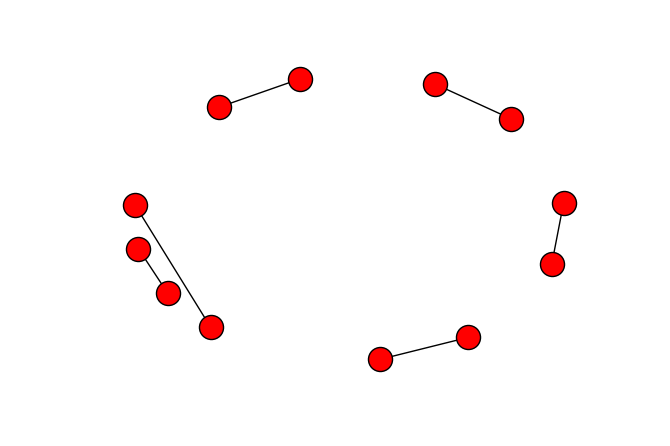

In [144]:
datapath = r"C:\Users\CAN_LC\Desktop\HT09\NULL_MODEL\1_minute\RC+RT\0.csv"
def construct_Net(datapath):
    G = nx.empty_graph()
    try:
        contact = pd.read_csv(datapath, header = None)
        source = list(contact[0])
        target = list(contact[1])
        for i in range(len(source)):
            G.add_edge(source[i],target[i])
        return G
    except:
        print "empty net!"
        return G

G = construct_Net(datapath)

print "Network has %s nodes" % len(G.nodes())
print "Network has %s edges" % len(G.edges())
print nx.number_connected_components(G)
nx.draw(G,pos=nx.spring_layout(G))

plt.show()

network_0 has 336 links
network_0 has 102 nodes
network_0 density is: 0.065230052417
0.0620597753665
density: 0.0513590391909
0.0642593671132
density: 0.0521491782554
0.0582524271845
density: 0.0483565107459
0.0578528441079
density: 0.0468552465234
0.0650505050505
density: 0.0508849557522
0.0649738610904
density: 0.0547566371681
0.0646464646465
density: 0.0504108723135
0.0605368360937
density: 0.0500948166877
0.0725857353251
density: 0.0544405815424
0.0627333831217
density: 0.0529393173198
0.0609590370802
density: 0.0493836915297
0.0555457591254
density: 0.0496207332491
0.0599876314162
density: 0.0456700379267
0.0632859204288
density: 0.0482774968394
0.0625121335663
density: 0.0505689001264
0.0671714230247
density: 0.0544405815424
0.0590176664725
density: 0.0480404551201
0.0702947845805
density: 0.0535714285714
0.0661719233148
density: 0.0504108723135
0.0566037735849
density: 0.0495417193426
0.0698824984539
density: 0.0533343868521
0.0623179965055
density: 0.0505689001264
0.05979421471

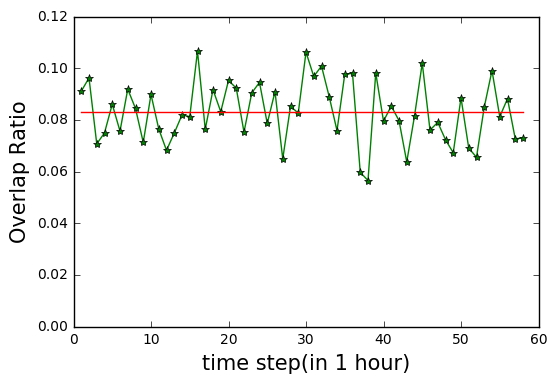

In [163]:
resolution = 60
netN = 10617/(3*resolution)+1

datapath = r"C:\Users\CAN_LC\Desktop\HT09\NULL_MODEL\%s_minute\RC+RT\0.csv"%resolution
temporalNetFile1 = construct_Net(datapath)
Net1 = nx.to_dict_of_dicts(temporalNetFile1)
link1 = []
for n, neighbors in Net1.iteritems(): 
    for u in neighbors:
        link1.append("%s_%s"%(n,u))
print "network_0 has %s links"%(len(temporalNetFile1.edges()))
print "network_0 has %s nodes"%(len(temporalNetFile1))
print "network_0 density is:",nx.density(temporalNetFile1)

commonRatio = []
lastLink = link1
count = 0
for i in range(1,netN):    
    tempPath = r"C:\Users\CAN_LC\Desktop\HT09\NULL_MODEL\%s_minute\RC+RT\%s.csv" %(resolution,i)
    temporalNetFile = construct_Net(tempPath)
    tempNet = nx.to_dict_of_dicts(temporalNetFile)
    if len(tempNet)>0 :
        print nx.density(nx.Graph(tempNet))             # only consider nodes appeared in this network
        templink = []
        for n, neighbors in tempNet.iteritems(): 
            for u in neighbors:
                templink.append("%s_%s"%(n,u))
#         print "network_%s has %s links"%(i,len(set(templink))/2)  
        print 'density:',len(templink)/float(113*112)   # take all nodes into consideration

        # calculate temporal corelation coefficient
#         tempRatio = len(set(lastLink) & set(templink))/(len(lastLink)*len(templink))**0.5
        tempRatio = len(set(lastLink) & set(templink))/float(len(set(lastLink) | set(templink)))
        commonRatio.append(tempRatio)
        lastLink = templink
    else:
        count += 1
print 'totally %s empty net'%count   

ave = sum(commonRatio)/len(commonRatio)
print "ave is",ave

fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)
# print commonRatio
ax.plot(range(1,len(commonRatio)+1),commonRatio,'g-*')
ax.plot(range(1,len(commonRatio)+1),[ave]*len(commonRatio),'r-')

# ax.legend(loc="best", fontsize=12)
ax.set_xlabel("time step(in 1 hour)",fontsize=15)
# ax.set_xlabel("time step(in %s minutes)"%resolution,fontsize=15)
ax.set_ylabel("Overlap Ratio",fontsize=15)
ax.set_yticks(np.arange(0,0.13,0.02))
# ax.set_xticks(np.arange(0,50,2))

# save fig
figpath1 = r"C:\Users\CAN_LC\Desktop\HT09\FIG\%s_minute_overlap_NullM_RC+RT.eps"%resolution
plt.savefig(figpath1,dpi=400,bbox_inches='tight')
figpath2 = r"C:\Users\CAN_LC\Desktop\HT09\FIG\%s_minute_overlap_NullM_RC+RT.png"%resolution
plt.savefig(figpath2,dpi=400,bbox_inches='tight')

plt.show()